In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [ ]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

# Check for null values
null_values = df.isnull().sum()

# Output the results
print(null_values)


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [ ]:
# Provide basic statistics
stats = df.describe()
print(stats)

       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000

# Part 1


⦁	What are the top 5 games by global sales?  

In [ ]:
top_5_games = df.sort_values(by='Global_Sales', ascending=False)
top_5_games.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


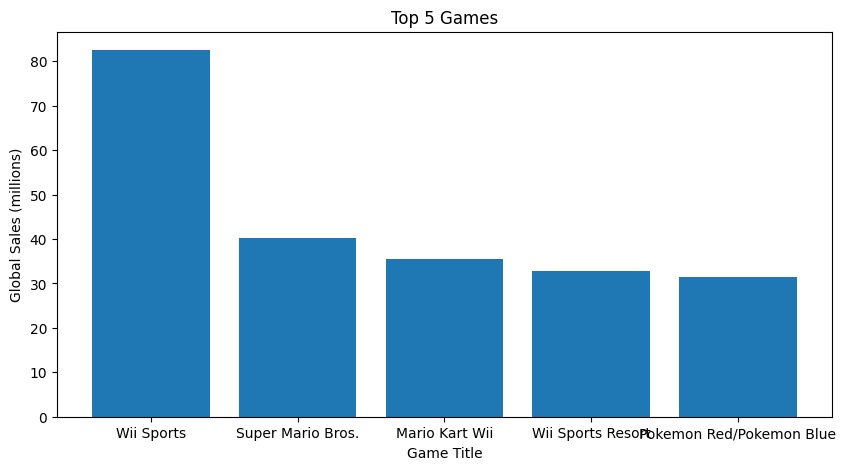

In [ ]:
top_5_games = df.nlargest(5, 'Global_Sales')
plt.figure(figsize=(10, 5))
plt.bar(top_5_games['Name'], top_5_games['Global_Sales'])
plt.xlabel('Game Title')
plt.ylabel('Global Sales (millions)')
plt.title('Top 5 Games')
plt.show()


⦁	Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

In [ ]:
# Filter the dataset for the years 2010-2014
filtered_df = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

# Calculate the correlation
correlation = filtered_df['NA_Sales'].corr(filtered_df['JP_Sales'])
print(f'The correlation between the NA_Sales and JP_Sales for the years 2010-2014 is {correlation}')

The correlation between the NA_Sales and JP_Sales for the years 2010-2014 is 0.26043134778810034


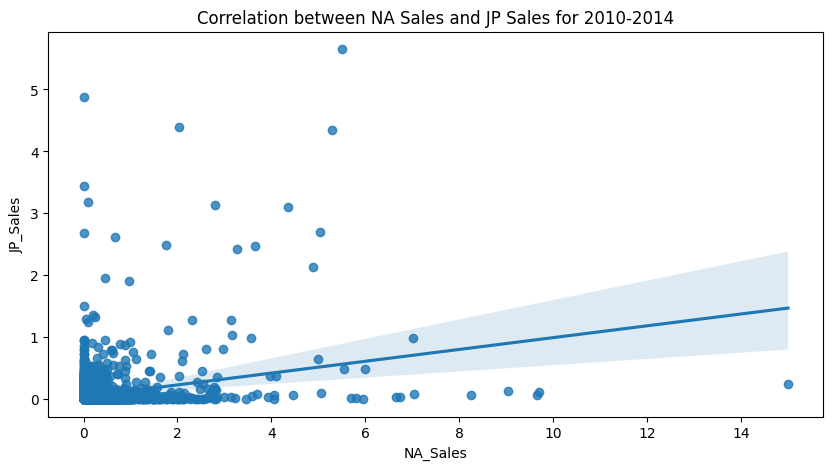

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x='NA_Sales', y='JP_Sales', data=filtered_df)
plt.title('Correlation between NA Sales and JP Sales for 2010-2014')
plt.show()


⦁	What is the distribution of the most popular 4 game genres?  

In [ ]:
genre_distribution = df['Genre'].value_counts()
genre_distribution.head(4)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Name: count, dtype: int64

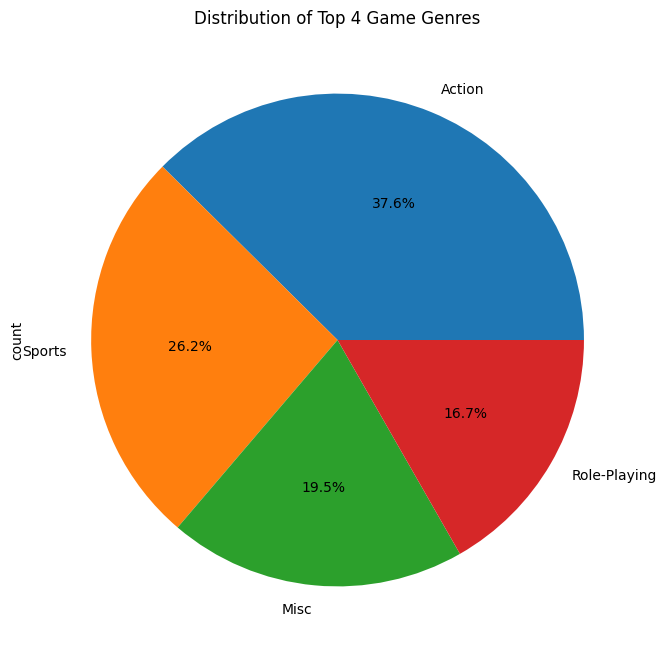

In [ ]:
genre_distribution.head(4)
plt.figure(figsize=(8, 8))
genre_distribution.head(4).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Top 4 Game Genres')
plt.show()


⦁	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [ ]:
# Splitting data
older_games = df[df['Year_of_Release'] <= 2005]
newer_games = df[df['Year_of_Release'] > 2005]

# Calculate the mean EU_Sales for both groups
older_games_eu_mean = older_games['EU_Sales'].mean()
newer_games_eu_mean = newer_games['EU_Sales'].mean()

print(f'YES, the mean of older_games ({older_games_eu_mean}) is greater than that of newer games ({newer_games_eu_mean}).')


YES, the mean of older_games (0.1479159168984132) is greater than that of newer games (0.14472284028248042).



⦁	What are the 3 most common “developer” in the dataset?  

In [ ]:
top_3_developers = df['Developer'].value_counts()
top_3_developers.head(3)

Developer
Ubisoft      204
EA Sports    172
EA Canada    167
Name: count, dtype: int64

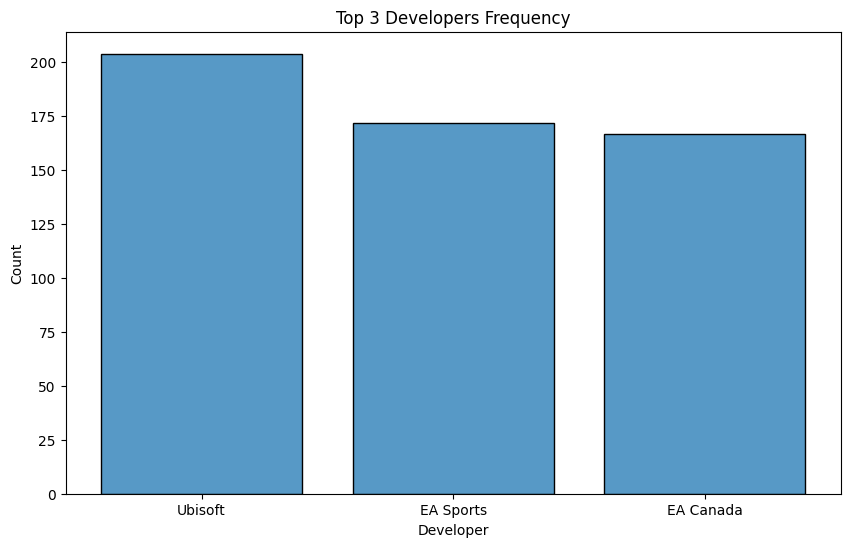

In [ ]:
top_developers = df['Developer'].value_counts().nlargest(3).index

# Filter the DataFrame to only include the top 3 developers
df_top_developers = df[df['Developer'].isin(top_developers)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_top_developers, x='Developer', shrink=0.8)
plt.title('Top 3 Developers Frequency')
plt.xlabel('Developer')
plt.ylabel('Count')
plt.show()

# Part 2




I have answered the following question based on reviewing the dataset.

**Question** : Find the games which has most sales? Focus should be on last five years.

Description : I have selected this question because it will give us an idea about the latest trend in the market. I have firstly calculated the max year from the dataset which is used to create a dataset of last 5 years. Later in the code, I have grouped by the filtered dataset by games and summed global sales. I have also added the genre in representation to give us an idea on category of game.

Then, I took the top 10 best performing games based on global sales and visulized on a scatter chart.

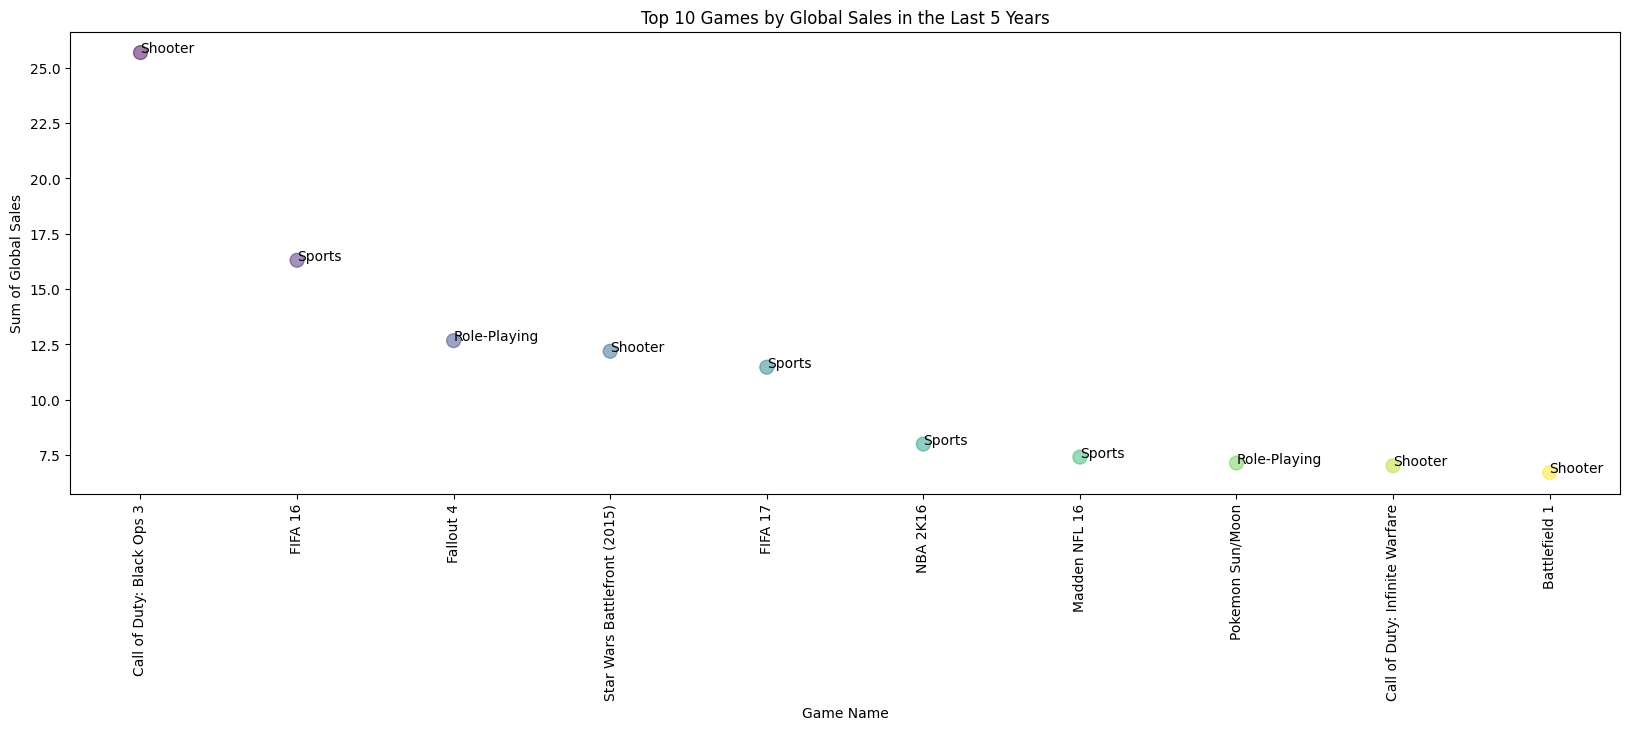

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

most_recent_year = df['Year_of_Release'].max()
df_recent = df[df['Year_of_Release'] >= most_recent_year - 5]
top_10_games = df_recent.groupby(['Name', 'Genre'])['Global_Sales'].sum().nlargest(10).reset_index()

#Visualization
plt.figure(figsize=(20, 6))
colors = range(len(top_10_games))
plt.scatter(top_10_games['Name'], top_10_games['Global_Sales'], s=100, c=colors, cmap='viridis', alpha=0.5)
plt.title('Top 10 Games by Global Sales in the Last 5 Years')
plt.xlabel('Game Name')
plt.ylabel('Sum of Global Sales')
plt.xticks(rotation=90)
for i, txt in enumerate(top_10_games['Genre']):
    plt.annotate(txt, (top_10_games['Name'][i], top_10_games['Global_Sales'][i]))
plt.show()


# Part 3



Q1 Why you chose the specific methods to engineer the data and how you achieved this in python (Part 1/Part 2)  

As, we have different questions to be answered, it's important to work on subset of main dataset. Subset of a dataset is creted by providing condition. We created subset using the filter condition and worked on it to display results and graphs.

In answering part 2, apart from using subsets, I also used group by method to group the data based on games and then add the global sales.


Q2 why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)

I have used bar graphs, histogram, pie chart and scatter plots in my visulization techniques. Main purpose of using them was that they are easy to understand and provide accurate information about the data to study. I have used a regplot in one of my answers which is great in showing corelation between two variables.
I have used scatter plot in Part 2 because I have to represent three variables on graph.

Q3 what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  

Following are the points I decided for visulizations,
Color: Colors are selected based on the type of data being presented and the audience. For a scatter plot or regplot, a palette that is distinct yet visually accessible to individuals with color vision deficiency can be important. For a heatmap or correlation plot, a diverging color scheme can help in distinguishing between high and low values.

Font: The font choice should ensure readability. The size of the font should be large enough to be readable.

Titles: Titles are essential for immediately conveying the purpose of visual. They should be concise but descriptive.

Text Position Tick Marks : The position of text, whether it's data labels or annotations, is adjusted to avoid overlapping with data points or other elements. I used rotate to adjust when overlapping occured.

Legend: If the plot contains multiple groups or categories, a legend is essential. The placement of the legend should not obstruct the data.

Interactivity: Adding interactivity such as hover effects, clickable legends, or zooming capability can greatly enhance the user experience.

Q4 what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)    

In part 2, my question lays stress on games that performed well in last 5 years. My aim was to get the insight about lastest trend in the market. The graph gives us information based on genre of games and games global sales. We can easily draw an insight that people really like shooting and sports based games in last 5 year. The global sale for these two is more than sum of remaing genres in last 5 years.